# Tutorial 05: Homework

### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) AND decision tree regressor (or boosted tree) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


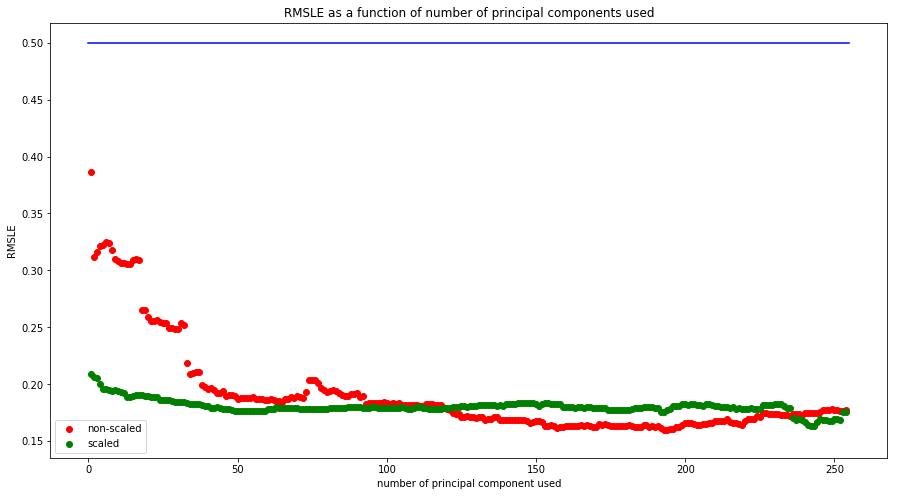

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt


# loading data
data = pd.read_csv('dataHW05.csv', index_col=0)
data = data.drop([data.columns[0],data.columns[1]], axis=1) # dropping the Id columns
data = data - data.mean()
# spliting data to train and test datasets
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis=1, errors='ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis=1, errors='ignore')
ytest = dtest.SalePrice

q = len(data.columns)-70



pca = PCA()
pca.fit_transform(X)
X1 = pca.transform(X)
Xtest1 = pca.transform(Xtest)

pca.fit_transform(scale(X))
X2 = pca.transform(scale(X))
Xtest2 = pca.transform(scale(Xtest))
RMSLE = []
RMSLE_scale = []

for n in range(1, q):
    Xsub1 = X1[:, 0:n]
    Xsubtest1 = Xtest1[:, 0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y)
    # save RMSLE
    RMSLE.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

    Xsub2 = X2[:, 0:n]
    Xsubtest2 = Xtest2[:, 0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub2, y)
    # save RMSLE
    RMSLE_scale.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))
    
plt.subplots(1, 1, figsize=(15, 8))
ns = plt.scatter(range(1, q), RMSLE, c='red')
s = plt.scatter(range(1, q), RMSLE_scale, c='green')
plt.title(u"RMSLE as a function of number of principal components used")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.plot([0, q], [0.5, 0.5], 'b-')
plt.legend((ns, s), ('non-scaled', 'scaled'))
plt.show()

There is weird behavior as we aproach reach whole nuber of all component, seems like scaling doesnt work so good for features with low correlation

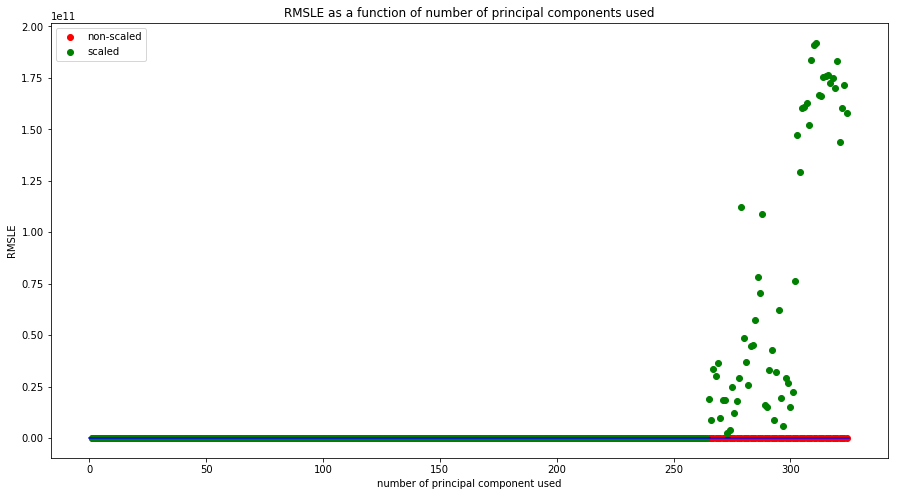

<Figure size 432x288 with 0 Axes>

In [4]:
q=len(data.columns)
RMSLE = []
RMSLE_scale = []
for n in range(1, q):
    Xsub1 = X1[:, 0:n]
    Xsubtest1 = Xtest1[:, 0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y)
    # save RMSLE
    RMSLE.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

    Xsub2 = X2[:, 0:n]
    Xsubtest2 = Xtest2[:, 0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub2, y)
    # save RMSLE
    RMSLE_scale.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))
    
plt.subplots(1, 1, figsize=(15, 8))
ns = plt.scatter(range(1, q), RMSLE, c='red')
s = plt.scatter(range(1, q), RMSLE_scale, c='green')
plt.title(u"RMSLE as a function of number of principal components used")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.plot([0, q], [1, 1], 'b-')
plt.legend((ns, s), ('non-scaled', 'scaled'))
plt.show()
plt.savefig('scaled_vs_nonscaled.jpeg')

### Lets try to order the collumns by correlation index and then do same as abow again



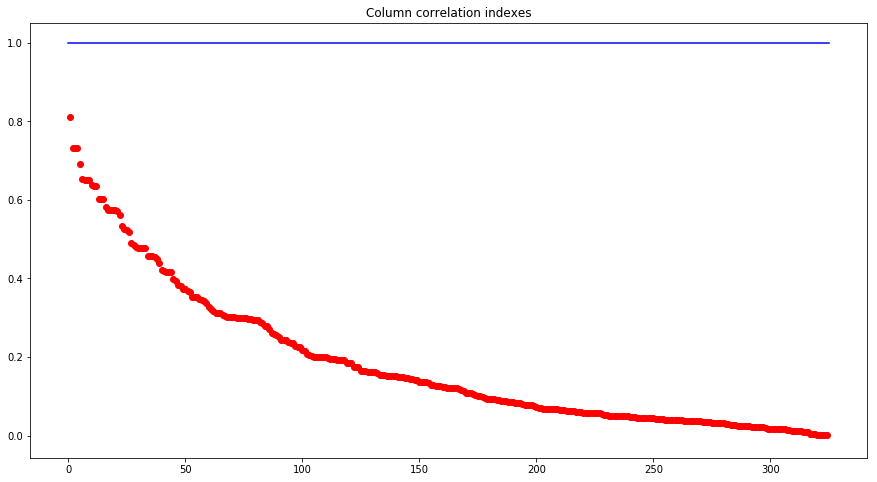

In [23]:
data = pd.read_csv('dataHW05.csv', index_col=0)
data = data.drop([data.columns[0],data.columns[1]], axis=1)
data = data - data.mean()

how_much = len(data.columns)
corr = data.corr(method='spearman')
corr_cols = corr.SalePrice.abs().nlargest(how_much)
plt.subplots(1, 1, figsize=(15, 8))
ns = plt.scatter(range(1, how_much), corr_cols[1:], c='red')
plt.title(u"Column correlation indexes")
plt.plot([0, how_much], [1, 1], 'b-')
plt.show()

In [24]:
data.head(5)

LotFrontage      LotArea  OverallQual  OverallCond  YearBuilt  \
0     7.376712 -2066.828082     0.900685    -0.575342  31.732192   
1    22.376712  -916.828082    -0.099315     2.424658   4.732192   
2    10.376712   733.171918     0.900685    -0.575342  29.732192   
3     2.376712  -966.828082     0.900685    -0.575342 -56.267808   
4    26.376712  3743.171918     1.900685    -0.575342  28.732192   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
0     18.134247   92.882877  262.360274  -46.549315 -417.240411   
1     -8.865753 -103.117123  534.360274  -46.549315 -283.240411   
2     17.134247   58.882877   42.360274  -46.549315 -133.240411   
3    -14.865753 -103.117123 -227.639726  -46.549315  -27.240411   
4     15.134247  246.882877  211.360274  -46.549315  -77.240411   

           ...            SaleType_ConLw  SaleType_New  SaleType_Oth  \
0          ...                 -0.003425     -0.083562     -0.002055   
1          ...                 -0.003425     -0.083562     -0.002055   
2          ...                 -0.003425     -0.083562     -0.002055   
3          ...                 -0.003425     -0.083562     -0.002055   
4          ...                 -0.003425     -0.083562     -0.002055   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0     0.132192              -0.069178               -0.00274   
1     0.132192              -0.069178               -0.00274   
2     0.132192              -0.069178               -0.00274   
3     0.132192               0.930822               -0.00274   
4     0.132192              -0.069178               -0.00274   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0             -0.008219             -0.013699              0.179452   
1             -0.008219             -0.013699              0.179452   
2             -0.008219             -0.013699              0.179452   
3             -0.008219             -0.013699             -0.820548   
4             -0.008219             -0.013699              0.179452   

   SaleCondition_Partial  
0              -0.085616  
1              -0.085616  
2              -0.085616  
3              -0.085616  
4              -0.085616  

[5 rows x 325 columns]

In [25]:
ix = data.corr().sort_values('SalePrice', ascending=False).index
data = data.loc[:, ix]
data.head(5) #just check the clumn order

SalePrice  OverallQual  LogGrLivArea  SqrtGrLivArea   GrLivArea  \
0   0.223642     0.900685      0.176322       2.962473  194.536301   
1   0.084959    -0.099315     -0.127267      -2.865034 -253.463699   
2   0.293114     0.900685      0.219782       3.871420  270.536301   
3  -0.174653     0.900685      0.180404       3.047026  201.536301   
4   0.405163     1.900685      0.427246       8.493160  682.536301   

   GarageCars  GarageArea  TotalBsmtSF  Log1stFlrSF  Sqrt1stFlrSF  \
0    0.232877   75.019863  -201.429452    -0.255015     -4.406152   
1    0.232877  -12.980137   204.570548     0.132793      1.861010   
2    0.232877  135.019863  -137.429452    -0.182992     -3.332127   
3    1.232877  169.019863  -301.429452    -0.139438     -2.663629   
4    1.232877  363.019863    87.570548     0.035580      0.174219   

       ...       Foundation_CBlock  MSZoning_RM  CentralAir_N  \
0      ...               -0.434247    -0.149315     -0.065068   
1      ...                0.565753    -0.149315     -0.065068   
2      ...               -0.434247    -0.149315     -0.065068   
3      ...               -0.434247    -0.149315     -0.065068   
4      ...               -0.434247    -0.149315     -0.065068   

   GarageType_Detchd  MasVnrType_None  GarageFinish_Unf  BsmtQual_TA  \
0          -0.265068        -0.591781         -0.414384    -0.444521   
1          -0.265068         0.408219         -0.414384    -0.444521   
2          -0.265068        -0.591781         -0.414384    -0.444521   
3           0.734932         0.408219          0.585616     0.555479   
4          -0.265068        -0.591781         -0.414384    -0.444521   

   FireplaceQu_0  KitchenQual_TA  ExterQual_TA  
0       0.527397       -0.503425     -0.620548  
1      -0.472603        0.496575      0.379452  
2      -0.472603       -0.503425     -0.620548  
3      -0.472603       -0.503425      0.379452  
4      -0.472603       -0.503425     -0.620548  

[5 rows x 325 columns]

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


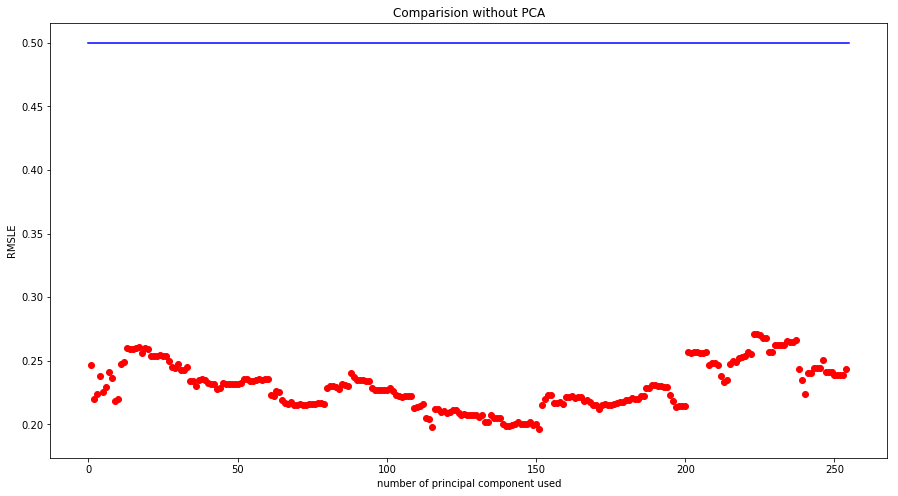

In [26]:
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis=1, errors='ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis=1, errors='ignore')
ytest = dtest.SalePrice

q = len(data.columns) - 70

X = X.as_matrix()

Xtest1 = Xtest.as_matrix()
Xtest2 = scale(Xtest.as_matrix())
RMSLE = []


for n in range(1, q):
    Xsub1 = X[:, 0:n]
    Xsubtest1 = Xtest1[:, 0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y)
    # save RMSLE
    RMSLE.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

  

plt.subplots(1, 1, figsize=(15, 8))
ns = plt.scatter(range(1, q), RMSLE, c='red')
plt.title(u"Comparision without PCA")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.plot([0, q], [0.5, 0.5], 'b-')
plt.show()


It looks weird without PCA on dat just ordered byc ocrreltation index